In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier

In [3]:
bank = pd.read_csv('Bank Dataset.csv')

In [4]:
bank.head()

,ID,Age,Experience,Income,ZIP_Code,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
bank.shape

(4982, 14)

In [6]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4982 entries, 0 to 4981
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  4982 non-null   int64  
 1   Age                 4982 non-null   int64  
 2   Experience          4982 non-null   int64  
 3   Income              4982 non-null   int64  
 4   ZIP_Code            4982 non-null   int64  
 5   Family_members      4982 non-null   int64  
 6   CCAvg               4982 non-null   float64
 7   Education           4982 non-null   int64  
 8   Mortgage            4982 non-null   int64  
 9   Personal_Loan       4982 non-null   int64  
 10  Securities_Account  4982 non-null   int64  
 11  CD_Account          4982 non-null   int64  
 12  Online              4982 non-null   int64  
 13  CreditCard          4982 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 545.0 KB


In [7]:
bank.isnull().sum().any()

False

In [8]:
bank.drop(['ID','ZIP_Code'], axis=1)

,Age,Experience,Income,Family_members,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4977,29,3,40,1,1.9,3,0,0,0,0,1,0
4978,30,4,15,4,0.4,1,85,0,0,0,1,0
4979,63,39,24,2,0.3,3,0,0,0,0,0,0
4980,65,40,49,3,0.5,2,0,0,0,0,1,0


In [9]:
from sklearn.model_selection import train_test_split

In [10]:
y = bank['Personal_Loan']
x = bank.drop(['Personal_Loan'], axis=1)

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y , test_size=0.30, random_state=1)

In [13]:
# Checking dimensions on the train and test data
print('x_train: ',x_train.shape)
print('x_test: ',x_test.shape)
print('y_train: ',y_train.shape)
print('y_test: ',y_test.shape)

x_train:  (3487, 13)
x_test:  (1495, 13)
y_train:  (3487,)
y_test:  (1495,)


In [14]:
from sklearn.preprocessing import StandardScaler

In [18]:
sc = StandardScaler()

In [19]:
x_train = sc.fit_transform(x_train)

In [20]:
x_train

array([[ 1.06261795,  0.75866264,  0.34199978, ..., -0.25823838,
         0.81708209, -0.64657259],
       [ 1.44189417,  1.54405303,  1.47477723, ..., -0.25823838,
         0.81708209,  1.54661674],
       [-0.28646199,  1.19499064,  1.30050378, ..., -0.25823838,
        -1.22386723, -0.64657259],
       ...,
       [-1.11264272,  1.02045944,  1.0390936 , ..., -0.25823838,
        -1.22386723, -0.64657259],
       [ 1.03472999, -1.33571173, -1.2264613 , ..., -0.25823838,
         0.81708209, -0.64657259],
       [-1.5818576 ,  0.49686585,  0.51627324, ..., -0.25823838,
        -1.22386723, -0.64657259]])

In [21]:
x_test = sc.transform(x_test)

In [22]:
x_test

array([[ 1.46559893, -0.98664934, -1.13932457, ..., -0.25823838,
         0.81708209, -0.64657259],
       [ 0.33474226, -0.28852455, -0.18082058, ..., -0.25823838,
         0.81708209, -0.64657259],
       [ 1.29757399, -1.59750853, -1.48787148, ..., -0.25823838,
        -1.22386723, -0.64657259],
       ...,
       [-1.5212013 ,  1.10772504,  1.0390936 , ..., -0.25823838,
         0.81708209, -0.64657259],
       [-0.37709785,  0.75866264,  0.34199978, ..., -0.25823838,
         0.81708209, -0.64657259],
       [-1.28136486,  1.71858423,  1.82332414, ...,  3.8723911 ,
         0.81708209, -0.64657259]])

In [25]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000, solver='sgd', verbose=True, random_state=1, tol=0.000000001)

In [26]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.55148186
Iteration 2, loss = 0.47344196
Iteration 3, loss = 0.41166049
Iteration 4, loss = 0.37065489
Iteration 5, loss = 0.34284418
Iteration 6, loss = 0.32277304
Iteration 7, loss = 0.30732533
Iteration 8, loss = 0.29474324
Iteration 9, loss = 0.28426676
Iteration 10, loss = 0.27512518
Iteration 11, loss = 0.26713147
Iteration 12, loss = 0.26000083
Iteration 13, loss = 0.25345890
Iteration 14, loss = 0.24756049
Iteration 15, loss = 0.24206441
Iteration 16, loss = 0.23692905
Iteration 17, loss = 0.23225323
Iteration 18, loss = 0.22784432
Iteration 19, loss = 0.22375707
Iteration 20, loss = 0.21989675
Iteration 21, loss = 0.21632681
Iteration 22, loss = 0.21286450
Iteration 23, loss = 0.20963389
Iteration 24, loss = 0.20665625
Iteration 25, loss = 0.20375244
Iteration 26, loss = 0.20103807
Iteration 27, loss = 0.19841429
Iteration 28, loss = 0.19595709
Iteration 29, loss = 0.19358344
Iteration 30, loss = 0.19130855
Iteration 31, loss = 0.18915653
Iteration 32, los

Iteration 255, loss = 0.08610292
Iteration 256, loss = 0.08598602
Iteration 257, loss = 0.08585570
Iteration 258, loss = 0.08573337
Iteration 259, loss = 0.08561058
Iteration 260, loss = 0.08547765
Iteration 261, loss = 0.08535151
Iteration 262, loss = 0.08522880
Iteration 263, loss = 0.08510682
Iteration 264, loss = 0.08498405
Iteration 265, loss = 0.08486921
Iteration 266, loss = 0.08475379
Iteration 267, loss = 0.08462800
Iteration 268, loss = 0.08450652
Iteration 269, loss = 0.08438816
Iteration 270, loss = 0.08427141
Iteration 271, loss = 0.08415750
Iteration 272, loss = 0.08403027
Iteration 273, loss = 0.08391273
Iteration 274, loss = 0.08380498
Iteration 275, loss = 0.08368326
Iteration 276, loss = 0.08356750
Iteration 277, loss = 0.08344806
Iteration 278, loss = 0.08333515
Iteration 279, loss = 0.08321948
Iteration 280, loss = 0.08310471
Iteration 281, loss = 0.08300229
Iteration 282, loss = 0.08287895
Iteration 283, loss = 0.08277239
Iteration 284, loss = 0.08266363
Iteration 

Iteration 504, loss = 0.06594843
Iteration 505, loss = 0.06589749
Iteration 506, loss = 0.06583851
Iteration 507, loss = 0.06578859
Iteration 508, loss = 0.06573537
Iteration 509, loss = 0.06568794
Iteration 510, loss = 0.06563488
Iteration 511, loss = 0.06558918
Iteration 512, loss = 0.06553692
Iteration 513, loss = 0.06549114
Iteration 514, loss = 0.06543246
Iteration 515, loss = 0.06538563
Iteration 516, loss = 0.06533196
Iteration 517, loss = 0.06528612
Iteration 518, loss = 0.06523305
Iteration 519, loss = 0.06518834
Iteration 520, loss = 0.06513535
Iteration 521, loss = 0.06509188
Iteration 522, loss = 0.06503341
Iteration 523, loss = 0.06499552
Iteration 524, loss = 0.06494095
Iteration 525, loss = 0.06488953
Iteration 526, loss = 0.06484319
Iteration 527, loss = 0.06479074
Iteration 528, loss = 0.06474367
Iteration 529, loss = 0.06470438
Iteration 530, loss = 0.06464853
Iteration 531, loss = 0.06460551
Iteration 532, loss = 0.06456160
Iteration 533, loss = 0.06450479
Iteration 

Iteration 756, loss = 0.05620137
Iteration 757, loss = 0.05617021
Iteration 758, loss = 0.05613368
Iteration 759, loss = 0.05610589
Iteration 760, loss = 0.05607586
Iteration 761, loss = 0.05604802
Iteration 762, loss = 0.05602053
Iteration 763, loss = 0.05599549
Iteration 764, loss = 0.05596030
Iteration 765, loss = 0.05592872
Iteration 766, loss = 0.05590461
Iteration 767, loss = 0.05587477
Iteration 768, loss = 0.05584256
Iteration 769, loss = 0.05581509
Iteration 770, loss = 0.05578303
Iteration 771, loss = 0.05575640
Iteration 772, loss = 0.05572220
Iteration 773, loss = 0.05569653
Iteration 774, loss = 0.05566939
Iteration 775, loss = 0.05563971
Iteration 776, loss = 0.05561437
Iteration 777, loss = 0.05557967
Iteration 778, loss = 0.05555443
Iteration 779, loss = 0.05552834
Iteration 780, loss = 0.05549901
Iteration 781, loss = 0.05546536
Iteration 782, loss = 0.05544085
Iteration 783, loss = 0.05541149
Iteration 784, loss = 0.05538901
Iteration 785, loss = 0.05535171
Iteration 

Iteration 1010, loss = 0.04999984
Iteration 1011, loss = 0.04997959
Iteration 1012, loss = 0.04996804
Iteration 1013, loss = 0.04993875
Iteration 1014, loss = 0.04993222
Iteration 1015, loss = 0.04989939
Iteration 1016, loss = 0.04988530
Iteration 1017, loss = 0.04986460
Iteration 1018, loss = 0.04984617
Iteration 1019, loss = 0.04983016
Iteration 1020, loss = 0.04980775
Iteration 1021, loss = 0.04978828
Iteration 1022, loss = 0.04976534
Iteration 1023, loss = 0.04974833
Iteration 1024, loss = 0.04973184
Iteration 1025, loss = 0.04970944
Iteration 1026, loss = 0.04969131
Iteration 1027, loss = 0.04967643
Iteration 1028, loss = 0.04965059
Iteration 1029, loss = 0.04963418
Iteration 1030, loss = 0.04961929
Iteration 1031, loss = 0.04959708
Iteration 1032, loss = 0.04957221
Iteration 1033, loss = 0.04955408
Iteration 1034, loss = 0.04953376
Iteration 1035, loss = 0.04951434
Iteration 1036, loss = 0.04950378
Iteration 1037, loss = 0.04948125
Iteration 1038, loss = 0.04945923
Iteration 1039

Iteration 1252, loss = 0.04595589
Iteration 1253, loss = 0.04594159
Iteration 1254, loss = 0.04592526
Iteration 1255, loss = 0.04591200
Iteration 1256, loss = 0.04590001
Iteration 1257, loss = 0.04588076
Iteration 1258, loss = 0.04587110
Iteration 1259, loss = 0.04585118
Iteration 1260, loss = 0.04584252
Iteration 1261, loss = 0.04582268
Iteration 1262, loss = 0.04581273
Iteration 1263, loss = 0.04580310
Iteration 1264, loss = 0.04578504
Iteration 1265, loss = 0.04577342
Iteration 1266, loss = 0.04575250
Iteration 1267, loss = 0.04573596
Iteration 1268, loss = 0.04572482
Iteration 1269, loss = 0.04570722
Iteration 1270, loss = 0.04569520
Iteration 1271, loss = 0.04568900
Iteration 1272, loss = 0.04566530
Iteration 1273, loss = 0.04564728
Iteration 1274, loss = 0.04564506
Iteration 1275, loss = 0.04562179
Iteration 1276, loss = 0.04561189
Iteration 1277, loss = 0.04560114
Iteration 1278, loss = 0.04558532
Iteration 1279, loss = 0.04557379
Iteration 1280, loss = 0.04555381
Iteration 1281

Iteration 1496, loss = 0.04280046
Iteration 1497, loss = 0.04279527
Iteration 1498, loss = 0.04277402
Iteration 1499, loss = 0.04276522
Iteration 1500, loss = 0.04275541
Iteration 1501, loss = 0.04274295
Iteration 1502, loss = 0.04273318
Iteration 1503, loss = 0.04272482
Iteration 1504, loss = 0.04270733
Iteration 1505, loss = 0.04269824
Iteration 1506, loss = 0.04268826
Iteration 1507, loss = 0.04267998
Iteration 1508, loss = 0.04266189
Iteration 1509, loss = 0.04265473
Iteration 1510, loss = 0.04264123
Iteration 1511, loss = 0.04264016
Iteration 1512, loss = 0.04262546
Iteration 1513, loss = 0.04261576
Iteration 1514, loss = 0.04260251
Iteration 1515, loss = 0.04258953
Iteration 1516, loss = 0.04257211
Iteration 1517, loss = 0.04256860
Iteration 1518, loss = 0.04255631
Iteration 1519, loss = 0.04254641
Iteration 1520, loss = 0.04252844
Iteration 1521, loss = 0.04252373
Iteration 1522, loss = 0.04252234
Iteration 1523, loss = 0.04250093
Iteration 1524, loss = 0.04248825
Iteration 1525

Iteration 1738, loss = 0.04033073
Iteration 1739, loss = 0.04032367
Iteration 1740, loss = 0.04031424
Iteration 1741, loss = 0.04031280
Iteration 1742, loss = 0.04029553
Iteration 1743, loss = 0.04028844
Iteration 1744, loss = 0.04027580
Iteration 1745, loss = 0.04026881
Iteration 1746, loss = 0.04026058
Iteration 1747, loss = 0.04025327
Iteration 1748, loss = 0.04024132
Iteration 1749, loss = 0.04023054
Iteration 1750, loss = 0.04022489
Iteration 1751, loss = 0.04021130
Iteration 1752, loss = 0.04019941
Iteration 1753, loss = 0.04019052
Iteration 1754, loss = 0.04018194
Iteration 1755, loss = 0.04017369
Iteration 1756, loss = 0.04016225
Iteration 1757, loss = 0.04015519
Iteration 1758, loss = 0.04015127
Iteration 1759, loss = 0.04013722
Iteration 1760, loss = 0.04012792
Iteration 1761, loss = 0.04011562
Iteration 1762, loss = 0.04011151
Iteration 1763, loss = 0.04010163
Iteration 1764, loss = 0.04008663
Iteration 1765, loss = 0.04008738
Iteration 1766, loss = 0.04007470
Iteration 1767

Iteration 1980, loss = 0.03822896
Iteration 1981, loss = 0.03822152
Iteration 1982, loss = 0.03821467
Iteration 1983, loss = 0.03821088
Iteration 1984, loss = 0.03819614
Iteration 1985, loss = 0.03818456
Iteration 1986, loss = 0.03817542
Iteration 1987, loss = 0.03817060
Iteration 1988, loss = 0.03816956
Iteration 1989, loss = 0.03815439
Iteration 1990, loss = 0.03814472
Iteration 1991, loss = 0.03814053
Iteration 1992, loss = 0.03813197
Iteration 1993, loss = 0.03812698
Iteration 1994, loss = 0.03811744
Iteration 1995, loss = 0.03811023
Iteration 1996, loss = 0.03809826
Iteration 1997, loss = 0.03809580
Iteration 1998, loss = 0.03808650
Iteration 1999, loss = 0.03807435
Iteration 2000, loss = 0.03806995
Iteration 2001, loss = 0.03805804
Iteration 2002, loss = 0.03805116
Iteration 2003, loss = 0.03804304
Iteration 2004, loss = 0.03803902
Iteration 2005, loss = 0.03802873
Iteration 2006, loss = 0.03802011
Iteration 2007, loss = 0.03801626
Iteration 2008, loss = 0.03800404
Iteration 2009

Iteration 2225, loss = 0.03637830
Iteration 2226, loss = 0.03636541
Iteration 2227, loss = 0.03635814
Iteration 2228, loss = 0.03635339
Iteration 2229, loss = 0.03634695
Iteration 2230, loss = 0.03633650
Iteration 2231, loss = 0.03633401
Iteration 2232, loss = 0.03632270
Iteration 2233, loss = 0.03631991
Iteration 2234, loss = 0.03631062
Iteration 2235, loss = 0.03630332
Iteration 2236, loss = 0.03629921
Iteration 2237, loss = 0.03628783
Iteration 2238, loss = 0.03628425
Iteration 2239, loss = 0.03628199
Iteration 2240, loss = 0.03626839
Iteration 2241, loss = 0.03625672
Iteration 2242, loss = 0.03625199
Iteration 2243, loss = 0.03624395
Iteration 2244, loss = 0.03623605
Iteration 2245, loss = 0.03623417
Iteration 2246, loss = 0.03622215
Iteration 2247, loss = 0.03621759
Iteration 2248, loss = 0.03621461
Iteration 2249, loss = 0.03619808
Iteration 2250, loss = 0.03619642
Iteration 2251, loss = 0.03618589
Iteration 2252, loss = 0.03617977
Iteration 2253, loss = 0.03616815
Iteration 2254

Iteration 2472, loss = 0.03471826
Iteration 2473, loss = 0.03470671
Iteration 2474, loss = 0.03470080
Iteration 2475, loss = 0.03469927
Iteration 2476, loss = 0.03468487
Iteration 2477, loss = 0.03467782
Iteration 2478, loss = 0.03467682
Iteration 2479, loss = 0.03466739
Iteration 2480, loss = 0.03465709
Iteration 2481, loss = 0.03465377
Iteration 2482, loss = 0.03464690
Iteration 2483, loss = 0.03464531
Iteration 2484, loss = 0.03463147
Iteration 2485, loss = 0.03463116
Iteration 2486, loss = 0.03462144
Iteration 2487, loss = 0.03461795
Iteration 2488, loss = 0.03460827
Iteration 2489, loss = 0.03460635
Iteration 2490, loss = 0.03460149
Iteration 2491, loss = 0.03459047
Iteration 2492, loss = 0.03458388
Iteration 2493, loss = 0.03457838
Iteration 2494, loss = 0.03457106
Iteration 2495, loss = 0.03456366
Iteration 2496, loss = 0.03455626
Iteration 2497, loss = 0.03455607
Iteration 2498, loss = 0.03454612
Iteration 2499, loss = 0.03454468
Iteration 2500, loss = 0.03453664
Iteration 2501

Iteration 2718, loss = 0.03324950
Iteration 2719, loss = 0.03324413
Iteration 2720, loss = 0.03325269
Iteration 2721, loss = 0.03323618
Iteration 2722, loss = 0.03323066
Iteration 2723, loss = 0.03322666
Iteration 2724, loss = 0.03322552
Iteration 2725, loss = 0.03321297
Iteration 2726, loss = 0.03320610
Iteration 2727, loss = 0.03320681
Iteration 2728, loss = 0.03319502
Iteration 2729, loss = 0.03318956
Iteration 2730, loss = 0.03318440
Iteration 2731, loss = 0.03317734
Iteration 2732, loss = 0.03317137
Iteration 2733, loss = 0.03316737
Iteration 2734, loss = 0.03316571
Iteration 2735, loss = 0.03315744
Iteration 2736, loss = 0.03314923
Iteration 2737, loss = 0.03314456
Iteration 2738, loss = 0.03314276
Iteration 2739, loss = 0.03313505
Iteration 2740, loss = 0.03312562
Iteration 2741, loss = 0.03312179
Iteration 2742, loss = 0.03311531
Iteration 2743, loss = 0.03311162
Iteration 2744, loss = 0.03310233
Iteration 2745, loss = 0.03310541
Iteration 2746, loss = 0.03309374
Iteration 2747

Iteration 2963, loss = 0.03188339
Iteration 2964, loss = 0.03188039
Iteration 2965, loss = 0.03187159
Iteration 2966, loss = 0.03187169
Iteration 2967, loss = 0.03185843
Iteration 2968, loss = 0.03186005
Iteration 2969, loss = 0.03185640
Iteration 2970, loss = 0.03185085
Iteration 2971, loss = 0.03184544
Iteration 2972, loss = 0.03183325
Iteration 2973, loss = 0.03183050
Iteration 2974, loss = 0.03182504
Iteration 2975, loss = 0.03182225
Iteration 2976, loss = 0.03181221
Iteration 2977, loss = 0.03180729
Iteration 2978, loss = 0.03180361
Iteration 2979, loss = 0.03180471
Iteration 2980, loss = 0.03179682
Iteration 2981, loss = 0.03178786
Iteration 2982, loss = 0.03178376
Iteration 2983, loss = 0.03177752
Iteration 2984, loss = 0.03177658
Iteration 2985, loss = 0.03177137
Iteration 2986, loss = 0.03175952
Iteration 2987, loss = 0.03175845
Iteration 2988, loss = 0.03175000
Iteration 2989, loss = 0.03174382
Iteration 2990, loss = 0.03173760
Iteration 2991, loss = 0.03173136
Iteration 2992

Iteration 3205, loss = 0.03062907
Iteration 3206, loss = 0.03062262
Iteration 3207, loss = 0.03061341
Iteration 3208, loss = 0.03061152
Iteration 3209, loss = 0.03061108
Iteration 3210, loss = 0.03060235
Iteration 3211, loss = 0.03059278
Iteration 3212, loss = 0.03059555
Iteration 3213, loss = 0.03058453
Iteration 3214, loss = 0.03057750
Iteration 3215, loss = 0.03057662
Iteration 3216, loss = 0.03056805
Iteration 3217, loss = 0.03057478
Iteration 3218, loss = 0.03056123
Iteration 3219, loss = 0.03055731
Iteration 3220, loss = 0.03054975
Iteration 3221, loss = 0.03054556
Iteration 3222, loss = 0.03053945
Iteration 3223, loss = 0.03053614
Iteration 3224, loss = 0.03053326
Iteration 3225, loss = 0.03052816
Iteration 3226, loss = 0.03052328
Iteration 3227, loss = 0.03051490
Iteration 3228, loss = 0.03051070
Iteration 3229, loss = 0.03050525
Iteration 3230, loss = 0.03050196
Iteration 3231, loss = 0.03049503
Iteration 3232, loss = 0.03049710
Iteration 3233, loss = 0.03048683
Iteration 3234

Iteration 3449, loss = 0.02944014
Iteration 3450, loss = 0.02943689
Iteration 3451, loss = 0.02943918
Iteration 3452, loss = 0.02942035
Iteration 3453, loss = 0.02942867
Iteration 3454, loss = 0.02941723
Iteration 3455, loss = 0.02941220
Iteration 3456, loss = 0.02941169
Iteration 3457, loss = 0.02939829
Iteration 3458, loss = 0.02939671
Iteration 3459, loss = 0.02939354
Iteration 3460, loss = 0.02938756
Iteration 3461, loss = 0.02938290
Iteration 3462, loss = 0.02937774
Iteration 3463, loss = 0.02937379
Iteration 3464, loss = 0.02936701
Iteration 3465, loss = 0.02936652
Iteration 3466, loss = 0.02936095
Iteration 3467, loss = 0.02934865
Iteration 3468, loss = 0.02934686
Iteration 3469, loss = 0.02934925
Iteration 3470, loss = 0.02934401
Iteration 3471, loss = 0.02933664
Iteration 3472, loss = 0.02934105
Iteration 3473, loss = 0.02932568
Iteration 3474, loss = 0.02932098
Iteration 3475, loss = 0.02931812
Iteration 3476, loss = 0.02931276
Iteration 3477, loss = 0.02931029
Iteration 3478

Iteration 3690, loss = 0.02834813
Iteration 3691, loss = 0.02834301
Iteration 3692, loss = 0.02833619
Iteration 3693, loss = 0.02833577
Iteration 3694, loss = 0.02833607
Iteration 3695, loss = 0.02833021
Iteration 3696, loss = 0.02832656
Iteration 3697, loss = 0.02832322
Iteration 3698, loss = 0.02831570
Iteration 3699, loss = 0.02830890
Iteration 3700, loss = 0.02830435
Iteration 3701, loss = 0.02830154
Iteration 3702, loss = 0.02829528
Iteration 3703, loss = 0.02829043
Iteration 3704, loss = 0.02829252
Iteration 3705, loss = 0.02828161
Iteration 3706, loss = 0.02828584
Iteration 3707, loss = 0.02827307
Iteration 3708, loss = 0.02827215
Iteration 3709, loss = 0.02826902
Iteration 3710, loss = 0.02826261
Iteration 3711, loss = 0.02826360
Iteration 3712, loss = 0.02825470
Iteration 3713, loss = 0.02825169
Iteration 3714, loss = 0.02824394
Iteration 3715, loss = 0.02824083
Iteration 3716, loss = 0.02823522
Iteration 3717, loss = 0.02823058
Iteration 3718, loss = 0.02823018
Iteration 3719

Iteration 3935, loss = 0.02732368
Iteration 3936, loss = 0.02731554
Iteration 3937, loss = 0.02731688
Iteration 3938, loss = 0.02730717
Iteration 3939, loss = 0.02730369
Iteration 3940, loss = 0.02730170
Iteration 3941, loss = 0.02729398
Iteration 3942, loss = 0.02729316
Iteration 3943, loss = 0.02728832
Iteration 3944, loss = 0.02728518
Iteration 3945, loss = 0.02727580
Iteration 3946, loss = 0.02727944
Iteration 3947, loss = 0.02727200
Iteration 3948, loss = 0.02727043
Iteration 3949, loss = 0.02725693
Iteration 3950, loss = 0.02725709
Iteration 3951, loss = 0.02725927
Iteration 3952, loss = 0.02725276
Iteration 3953, loss = 0.02724406
Iteration 3954, loss = 0.02724690
Iteration 3955, loss = 0.02723604
Iteration 3956, loss = 0.02723862
Iteration 3957, loss = 0.02722849
Iteration 3958, loss = 0.02722721
Iteration 3959, loss = 0.02722456
Iteration 3960, loss = 0.02721752
Iteration 3961, loss = 0.02721031
Iteration 3962, loss = 0.02721335
Iteration 3963, loss = 0.02720607
Iteration 3964

Iteration 4178, loss = 0.02635151
Iteration 4179, loss = 0.02635023
Iteration 4180, loss = 0.02634448
Iteration 4181, loss = 0.02634136
Iteration 4182, loss = 0.02633583
Iteration 4183, loss = 0.02633596
Iteration 4184, loss = 0.02632813
Iteration 4185, loss = 0.02632834
Iteration 4186, loss = 0.02631976
Iteration 4187, loss = 0.02631896
Iteration 4188, loss = 0.02632677
Iteration 4189, loss = 0.02631507
Iteration 4190, loss = 0.02631782
Iteration 4191, loss = 0.02629883
Iteration 4192, loss = 0.02629654
Iteration 4193, loss = 0.02629509
Iteration 4194, loss = 0.02629852
Iteration 4195, loss = 0.02629548
Iteration 4196, loss = 0.02628998
Iteration 4197, loss = 0.02628543
Iteration 4198, loss = 0.02627861
Iteration 4199, loss = 0.02628101
Iteration 4200, loss = 0.02626716
Iteration 4201, loss = 0.02626458
Iteration 4202, loss = 0.02625760
Iteration 4203, loss = 0.02626728
Iteration 4204, loss = 0.02625655
Iteration 4205, loss = 0.02625585
Iteration 4206, loss = 0.02625329
Iteration 4207

Iteration 4425, loss = 0.02544083
Iteration 4426, loss = 0.02543492
Iteration 4427, loss = 0.02543319
Iteration 4428, loss = 0.02542828
Iteration 4429, loss = 0.02543124
Iteration 4430, loss = 0.02542222
Iteration 4431, loss = 0.02541678
Iteration 4432, loss = 0.02541447
Iteration 4433, loss = 0.02541103
Iteration 4434, loss = 0.02540666
Iteration 4435, loss = 0.02540600
Iteration 4436, loss = 0.02540411
Iteration 4437, loss = 0.02539796
Iteration 4438, loss = 0.02540133
Iteration 4439, loss = 0.02538914
Iteration 4440, loss = 0.02538953
Iteration 4441, loss = 0.02538064
Iteration 4442, loss = 0.02537617
Iteration 4443, loss = 0.02537794
Iteration 4444, loss = 0.02537247
Iteration 4445, loss = 0.02537245
Iteration 4446, loss = 0.02536624
Iteration 4447, loss = 0.02536495
Iteration 4448, loss = 0.02536373
Iteration 4449, loss = 0.02535755
Iteration 4450, loss = 0.02535245
Iteration 4451, loss = 0.02534543
Iteration 4452, loss = 0.02534770
Iteration 4453, loss = 0.02534131
Iteration 4454

Iteration 4671, loss = 0.02458964
Iteration 4672, loss = 0.02458015
Iteration 4673, loss = 0.02457502
Iteration 4674, loss = 0.02457243
Iteration 4675, loss = 0.02456849
Iteration 4676, loss = 0.02456684
Iteration 4677, loss = 0.02455832
Iteration 4678, loss = 0.02456205
Iteration 4679, loss = 0.02455144
Iteration 4680, loss = 0.02455212
Iteration 4681, loss = 0.02454853
Iteration 4682, loss = 0.02453957
Iteration 4683, loss = 0.02454130
Iteration 4684, loss = 0.02453360
Iteration 4685, loss = 0.02453538
Iteration 4686, loss = 0.02453538
Iteration 4687, loss = 0.02452741
Iteration 4688, loss = 0.02452741
Iteration 4689, loss = 0.02451820
Iteration 4690, loss = 0.02451970
Iteration 4691, loss = 0.02451302
Iteration 4692, loss = 0.02451034
Iteration 4693, loss = 0.02450599
Iteration 4694, loss = 0.02450302
Iteration 4695, loss = 0.02450454
Iteration 4696, loss = 0.02449728
Iteration 4697, loss = 0.02449480
Iteration 4698, loss = 0.02449327
Iteration 4699, loss = 0.02448795
Iteration 4700

Iteration 4917, loss = 0.02375766
Iteration 4918, loss = 0.02375946
Iteration 4919, loss = 0.02376369
Iteration 4920, loss = 0.02375268
Iteration 4921, loss = 0.02374463
Iteration 4922, loss = 0.02374481
Iteration 4923, loss = 0.02374264
Iteration 4924, loss = 0.02373825
Iteration 4925, loss = 0.02373325
Iteration 4926, loss = 0.02372977
Iteration 4927, loss = 0.02372794
Iteration 4928, loss = 0.02373124
Iteration 4929, loss = 0.02372042
Iteration 4930, loss = 0.02372270
Iteration 4931, loss = 0.02371837
Iteration 4932, loss = 0.02371740
Iteration 4933, loss = 0.02370910
Iteration 4934, loss = 0.02370970
Iteration 4935, loss = 0.02370294
Iteration 4936, loss = 0.02370090
Iteration 4937, loss = 0.02369936
Iteration 4938, loss = 0.02369715
Iteration 4939, loss = 0.02368550
Iteration 4940, loss = 0.02368884
Iteration 4941, loss = 0.02368363
Iteration 4942, loss = 0.02368410
Iteration 4943, loss = 0.02368218
Iteration 4944, loss = 0.02367615
Iteration 4945, loss = 0.02367060
Iteration 4946

C:\Users\guptap6\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (5000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [29]:
clf = MLPClassifier(hidden_layer_sizes=100, max_iter=5000, solver='sgd', verbose=True, random_state=1, tol=0.001)

In [30]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.55148186
Iteration 2, loss = 0.47344196
Iteration 3, loss = 0.41166049
Iteration 4, loss = 0.37065489
Iteration 5, loss = 0.34284418
Iteration 6, loss = 0.32277304
Iteration 7, loss = 0.30732533
Iteration 8, loss = 0.29474324
Iteration 9, loss = 0.28426676
Iteration 10, loss = 0.27512518
Iteration 11, loss = 0.26713147
Iteration 12, loss = 0.26000083
Iteration 13, loss = 0.25345890
Iteration 14, loss = 0.24756049
Iteration 15, loss = 0.24206441
Iteration 16, loss = 0.23692905
Iteration 17, loss = 0.23225323
Iteration 18, loss = 0.22784432
Iteration 19, loss = 0.22375707
Iteration 20, loss = 0.21989675
Iteration 21, loss = 0.21632681
Iteration 22, loss = 0.21286450
Iteration 23, loss = 0.20963389
Iteration 24, loss = 0.20665625
Iteration 25, loss = 0.20375244
Iteration 26, loss = 0.20103807
Iteration 27, loss = 0.19841429
Iteration 28, loss = 0.19595709
Iteration 29, loss = 0.19358344
Iteration 30, loss = 0.19130855
Iteration 31, loss = 0.18915653
Iteration 32, los

In [32]:
from sklearn.metrics import confusion_matrix, classification_report

In [33]:
confusion_matrix(y_test, y_pred)

array([[1331,    8],
       [  82,   74]], dtype=int64)

In [34]:
pred2 = clf.predict(x_train)
confusion_matrix(y_train, pred2)

array([[3152,   13],
       [ 176,  146]], dtype=int64)

In [35]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      1339
           1       0.90      0.47      0.62       156

    accuracy                           0.94      1495
   macro avg       0.92      0.73      0.79      1495
weighted avg       0.94      0.94      0.93      1495



In [36]:
print(classification_report(y_train, pred2))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97      3165
           1       0.92      0.45      0.61       322

    accuracy                           0.95      3487
   macro avg       0.93      0.72      0.79      3487
weighted avg       0.94      0.95      0.94      3487



In [37]:
import matplotlib.pyplot as plt

AUC :  0.966405659729377


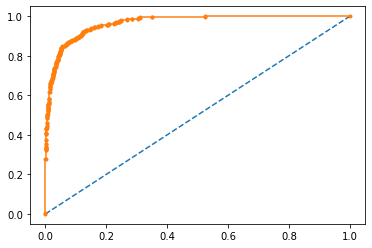

In [38]:
# AUC & ROC for the training data
# Predict probabilities
probs = clf.predict_proba(x_train)
probs = probs[: , 1]

# Calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC : ', auc)

# Calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0,1], [0,1], linestyle = '--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')

plt.show()